In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import axes3d

Empezamos declarando todas las libreias de las que haremos uso durante el ejercicio

In [2]:
df=pd.read_excel("USA.xlsx")#Leemos el fichero xlsx

Leemos el excel dado para la realizacion del problema

In [3]:
df#Mostramos el fichero del enunciado

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0
5,Wilmington,36.0,54.0,80.0,80.0,9.0,40.25,114.0
6,Washington,29.0,57.3,434.0,757.0,9.3,38.89,111.0
7,Jacksonville,14.0,68.4,136.0,529.0,8.8,54.47,116.0
8,Miami,10.0,75.5,207.0,335.0,9.0,59.80,128.0
9,Atlanta,24.0,61.5,368.0,497.0,9.1,48.34,115.0


# Ejercicio 1

Para la estandarizacion de los datos, primero, tendremos que coger solo los datos numericos, ya que los datos de tipo string no se deben de estandarizar. Para ello haremos uso de la funcion iloc, que nos permite coger las columnas que queramos de nuestro dataframe, en este caso, las columnas de la 1 a la 8. 

Sutituiremos todos esos valores nulos por 0, mediante la funcion replace y finalmente haremos uso de la funcion StandardScaler, para estandarizar los datos de forma completa.

In [4]:
ciudades=df.iloc[:,1:8] #Escogemos solo las columnas con valores numericos
df1 = ciudades.replace(np.nan, 0, regex=True) # Remplazamos los valores nan por 0
estd = StandardScaler().fit_transform(df1) #Estandarizamos los datos con la fncion StandarScaler

# Ejercicio 2 

Para sacar la matriz de covarianza, simplemente habria que seguir la formula, primero calculando la media de todos esos datos que han sido estandarizados en el ejercicio anterior y aplicar la formula que se mostrará a continuacion

In [19]:
media_vec = np.mean(estd, axis=0) #Sacamos la media
cov_mat = (estd - media_vec).T.dot((estd - media_vec)) / (estd.shape[0]-1) #Calculamos la matriz de covarianza
print('Matriz covarianza \n%s' %cov_mat) #Mostramos la matriz de covarianza

Matriz covarianza 
[[ 1.025      -0.4444402   0.66088794  0.50612407  0.09705772  0.0556517
   0.37880272]
 [-0.4444402   1.025      -0.19479322 -0.06424509 -0.35848312  0.39590975
  -0.44099817]
 [ 0.66088794 -0.19479322  1.025       0.97915108  0.24389551 -0.0332273
   0.13512503]
 [ 0.50612407 -0.06424509  0.97915108  1.025       0.21795984 -0.0267717
   0.04313527]
 [ 0.09705772 -0.35848312  0.24389551  0.21795984  1.025      -0.01331924
   0.16820823]
 [ 0.0556517   0.39590975 -0.0332273  -0.0267717  -0.01331924  1.025
   0.50849912]
 [ 0.37880272 -0.44099817  0.13512503  0.04313527  0.16820823  0.50849912
   1.025     ]]


Para la obtencion de los autovectores y autovalores, primero debemos de obtener la traspuesta de la matriz de covarianza, y finalmente hacer uso de la funcion linalg.eig() de numpy, que te saca los autovectores y los autovalores de la matriz que le indiques en el interior del parentesis

In [6]:
cov_mat = np.cov(estd.T) #Sacamos la traspuesta de la matriz de coovarianza 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #Calculamos autovectores y autovalores. Los motramos a continuacion
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.89698817e-01 -1.49529278e-01  1.83345726e-01 -7.30394180e-01
  -4.04210075e-01  8.45756306e-02 -1.43501956e-02]
 [-3.15370690e-01  2.36641125e-02  6.10661071e-01 -1.62465152e-01
   1.85227939e-01 -8.86378850e-02 -6.77136178e-01]
 [ 5.41168703e-01  7.45180920e-01 -4.27335187e-02  1.64101110e-01
   2.62723671e-02 -2.25881089e-01 -2.67159129e-01]
 [ 4.87588112e-01 -6.49125507e-01 -8.78632695e-02  3.49104824e-01
   1.13403769e-01 -2.82003804e-01 -3.44837959e-01]
 [ 2.49874928e-01 -1.57653766e-02  1.50053780e-01 -2.68254900e-01
   8.61901314e-01  5.54714865e-02  3.11265456e-01]
 [ 1.87312186e-04  1.03153086e-02 -5.53573845e-01 -1.60598783e-01
   1.83937185e-01  6.25879366e-01 -4.92036299e-01]
 [ 2.60179073e-01 -8.21739320e-03  5.04946685e-01  4.39969776e-01
  -1.09760698e-01  6.77967410e-01  1.09578949e-01]]

Eigenvalues 
[2.79632268 0.0261528  0.10279478 0.35544813 0.91429107 1.55014323
 1.42984731]


In [7]:
#Eliminamos ducplicados y los mostramos en orden descendente
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.796322676234295
0.026152798357252025
0.10279478420286702
0.3554481308521866
0.9142910708608596
1.5501432256880212
1.4298473138045202


Para la obtencion de los porcentajes, ya sean acumuludados o el respectivo de cada uno, tendremos primero que generar una matriz en la que se almacenaran todos ellos. Para llevar a cabo la formula del calculo de porcentajes, debemos de obtener el sumatorio de esos autovalores hayados en el apartado anterior.

Para la obtencion de los porcentajes, tendremos que hacer un for que recorra la lista de autovalores sacada en el anterior apartado y realizar la formula para cada uno de los autovalores. Mediante la funcion append se iran almacenando en nuestra matriz.

Finalmente generaremos un dataframe que contenga los autovalores, el % de Varianza y el acumulado

In [20]:
porcentajecov=[] #Matriz vacia en la que guardamos los porcentajes
sumatorio=eig_vals.sum() #Almacenamos el sumatorio de los autovalores
for i in eig_pairs:#Bucle para sacar los porcentajes de varianza
    porcentcov=(i[0]*100)/sumatorio
    porcentajecov.append(porcentcov)#Se añadiran los valores obtenidos a la matriz
dataframe=pd.DataFrame(eig_vals,index=['1', '2', '3', '4', '5', '6','7'],columns=['Autovalores']) #definimos un df de autovalores
dataframe['% Varianza']= porcentajecov #Añadimos la columna de porcentaje
dataframe['% Varianza Acu']= dataframe['% Varianza'].cumsum() #Añadimos la columna de porcentaje acumulado
dataframe

,Autovalores,% Varianza,% Varianza Acu
1,2.796323,38.973138,38.973138
2,0.026153,0.364499,39.337637
3,0.102795,1.432680,40.770317
4,0.355448,4.953981,45.724298
5,0.914291,12.742733,58.467031
6,1.550143,21.604784,80.071814
7,1.429847,19.928186,100.000000


Para iniciar el estudio de componentes, generaremos un dataframe de los autovectores, para ver los datos de una forma mas clara y comprensible. 

In [21]:
dataframe1=pd.DataFrame(eig_vecs,index=['SO2','Neg.Temp','Empresas','Poblacion','Viento','Precip','Dias'],columns=['Componente 1','Componente 2','Componente 3','Componente 4','Componente 5','Componente 6','Componente 7']) #definimos un df de autovalores
dataframe1

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
SO2,0.489699,-0.149529,0.183346,-0.730394,-0.404210,0.084576,-0.014350
Neg.Temp,-0.315371,0.023664,0.610661,-0.162465,0.185228,-0.088638,-0.677136
Empresas,0.541169,0.745181,-0.042734,0.164101,0.026272,-0.225881,-0.267159
Poblacion,0.487588,-0.649126,-0.087863,0.349105,0.113404,-0.282004,-0.344838
Viento,0.249875,-0.015765,0.150054,-0.268255,0.861901,0.055471,0.311265
Precip,0.000187,0.010315,-0.553574,-0.160599,0.183937,0.625879,-0.492036
Dias,0.260179,-0.008217,0.504947,0.439970,-0.109761,0.677967,0.109579


Tras conocer la matriz de autovectores y como esta distribuida, hemos hecho el siguiente estudio.

Como podemos ver, las caracteristicas que mas resaltan dentro del primer componente son los altos valores en poblacion, empresas y SO2. Dentro de este componente, se encontraran aquellas ciudades, en las que haya una abundante cantidad de poblacion. Esa abundante poblacion, habria dado lugar a grandes empresas y fabricas. Todas las fabricas generadas produciran un alto nivel de SO2 en la poblacion, por lo que podriamos decir que las ciudades dentro de este grupo son: Ciudades industrializadas y de alta poblacion.

Dentro del componente 2, podemos destacar de nuevo las variables de empresa y poblacion. En este caso nos encontramos con ciudades con muchas empresas y baja poblacion, por lo que se podrian considerar Ciudades comerciales, en las que tenemos pocas viviendas y muchas empresas. 

El componente 3, se consideraran ciudades cuyos aspectos mas relevantes estan reflejados en el tiempo. Seran ciudades Secas, con muy poca precipitacion y con alto Neg.Temp. Podremos decir que este componente hara referencia a las Ciudades calidas

El componente 4, son ciudades concenciadas con el medio ambiente debido a su alta poblacion y el bajo nivel de SO2. Podemos nombrar a este tipo de ciudades, Ciudades ecológicas.

El componente 5, son ciudades de entornos tropicales y costeras, debido al fuerte viento y al bajo nivel de SO2. Tambien destacar de estas ciudades un nivel equilibrado de precipitaciones. Detro de este apartado tambien podriamos poner a las ciudades correspondientes al componente 7.

El componente 6, son ciudades frias, con altas precipitaciones y un nivel equilibrado de viento.

Contamos 6 tipos de ciudades respectivamente: Ciudades Industrializadas, Ciudades Comerciales, Ciudades Calidas, Ciudades Ecológicas, Ciudades Costeras y Ciudades Frias

In [10]:
#Cuanta informacion perdemos con 2 componentes
InfoPer2= 100-dataframe.iloc[1,2]
print("Se pierde el",InfoPer2,"%")

Se pierde el 60.66236272346277 %


In [22]:
#Cuanta informacion representamos con 3 componentes
InfoRepre3= dataframe.iloc[2,2]
print("Se representa el",InfoRepre3,"%")

Se representa el 40.77031719574095 %


# Ejercicio 3

Para el inicio del ejercicio 3, primero mostraremos la informacion estandarizada anteriormente y un dataframe con los componentes que va usaremos, en este caso, Componente 1, 2 y 3.

In [12]:
estd1=pd.DataFrame(estd,columns=['SO2','Neg.Temp','Empresas','Poblacion','Viento','Precip','Dias'])
estd1

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
1,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
2,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
3,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
4,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266
5,0.256692,-0.247010,-0.688331,-0.924132,-0.314576,0.299384,0.003726
6,-0.045237,0.215237,-0.052281,0.259420,-0.101978,0.182416,-0.110860
7,-0.692227,1.770071,-0.587713,-0.139176,-0.456308,1.522388,0.080117
8,-0.864758,2.764604,-0.460144,-0.478333,-0.314576,1.980800,0.538462
9,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922


In [13]:
dataframe11=dataframe1.iloc[:,0:3]
dataframe11

,Componente 1,Componente 2,Componente 3
SO2,0.489699,-0.149529,0.183346
Neg.Temp,-0.315371,0.023664,0.610661
Empresas,0.541169,0.745181,-0.042734
Poblacion,0.487588,-0.649126,-0.087863
Viento,0.249875,-0.015765,0.150054
Precip,0.000187,0.010315,-0.553574
Dias,0.260179,-0.008217,0.504947


Para la obtencion del diagrama, usaremos dot, para multiplicar la matriz de componentes por todos los elementos de la matriz de los datos estandarizados, y mostraremos con scatter3D

,Componente 1,Componente 2,Componente 3,Ciudad
5,-0.697076,0.050735,-0.204217,Wilmington
33,-0.630961,0.135685,0.178324,Dallas
29,1.023394,-0.282674,0.468327,Pittsburgh
28,3.251064,-0.131214,-0.204613,Philadelphia


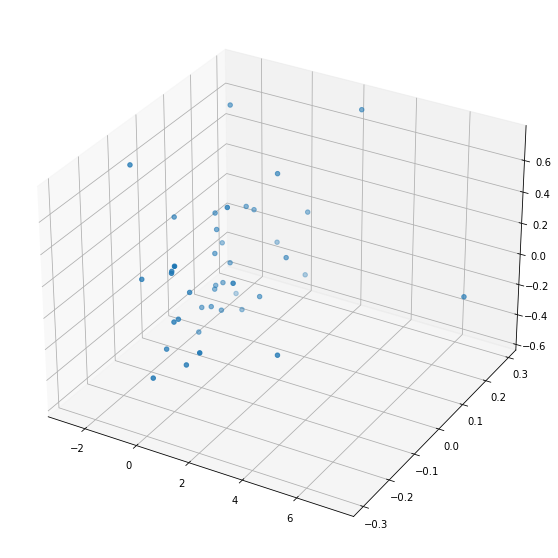

In [23]:
#Grafico 3D de los componentes 
#Cogemos los componentes que queramos analizar, seleccionando las columnas en dataframe11. Se cogeran las correctas despues de
#hacer el estudio
diagrama=estd1.dot(dataframe11)
diagrama["Ciudad"]=df["Ciudad"]
#Definimos los ejes del grafico 3D
x=diagrama["Componente 1"]
y=diagrama["Componente 2"]
z=diagrama["Componente 3"]
# Creamos el plano 3D 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
#Finalmente usamos la funcion scatter3D, para sacar el grafico segun los ejes definidos
ax.scatter3D(x,y,z)
#Funcion que escoge filas aleatorias del dataframe
diagrama.sample(4)
#El estudio realizado se hara sobre Dallas, Wilmington, Pittsburgh y Philadelphia
#Cada vez que se ejecute se cambiaran las ciudades aleatorias por eso lo relaizare sobre las ultimas que se han ejecutado

Tras conocer los datos de las ciudades, podemos ver que Dallas y Wilmington, tienen valores de componentes parecidos. Dallas se consideraria la ciudad mas calida de las 4 mostradas y junto con Wilmington, serian las ciudades menos comerciales e industrizalizadas de las mostradas. 

En el lado opuesto nos encontramos con Pittsburgh y Philadelphia, ciudades con ul alto nivel de industrializacio  y abundante poblacion, pero con un bajo nivel de comercio. Pittsburgh a diferecia de Philadelphia suele ser un pais mas inestable en cuanto a la meteorología, cambiando mucho de estado.

# Ejercicio 4

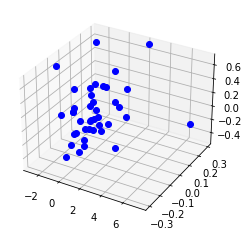

In [38]:
#Pasamos a realizar lo mismo realizado en el aparatdo anterior pero con sklearn
x=diagrama["Componente 1"]
y=diagrama["Componente 2"]
z=diagrama["Componente 3"]
fig2=plt.figure()
ax2  = fig2.add_subplot(111, projection='3d')
ax2.plot3D(x,y,z,'ob')
plt.show()